# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing libraries for EDA**

In [136]:
#importing the required modules and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

##**Loading the dataset**

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
bikeData=pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding='ISO-8859-1')

##**Performing Exploratory Data Analysis**

In [139]:
#Taking a look at the coloumns and first few rows gives an idea about the actual data
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [140]:
#Exploring the columns in our data
bikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [141]:
bikeData.shape

(8760, 14)

In [142]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



*   There are 8760 rows and 14 columns
*   None of the rows have missing values
*   Except Data column, all other columns are in correct data type



    








In [143]:
#Checking for null values
bikeData.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Hence our data has no null value

**Brief of different descriptive stats**
 
 

1.   Measures of Frequency :- Count, Percent, Frequency.
2.   Measures of Central Tendency :- Mean, Median, and Mode.

1.   Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation
2.   Measures of Position :- Percentile Ranks, Quartile Ranks








In [144]:
bikeData.describe().style.background_gradient()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [145]:
#Let's take a look at the unique values
bikeData.nunique().sort_values(ascending=True)

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [146]:
#We need to convert date column to DateTime
bikeData['Date'] = pd.to_datetime(bikeData['Date'], format='%d/%m/%Y')

#Extracting month,day and year from the date
bikeData['Month']=bikeData['Date'].dt.month
bikeData['Day']=bikeData['Date'].dt.day
bikeData['Year']=bikeData['Date'].dt.year

In [147]:
# Getting the numerical variables
num_cols=list(bikeData.select_dtypes(exclude=['object','datetime64[ns]']).columns)
print(num_cols)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'Year']


##**Now, let's have a look at the distribution of each variable** 

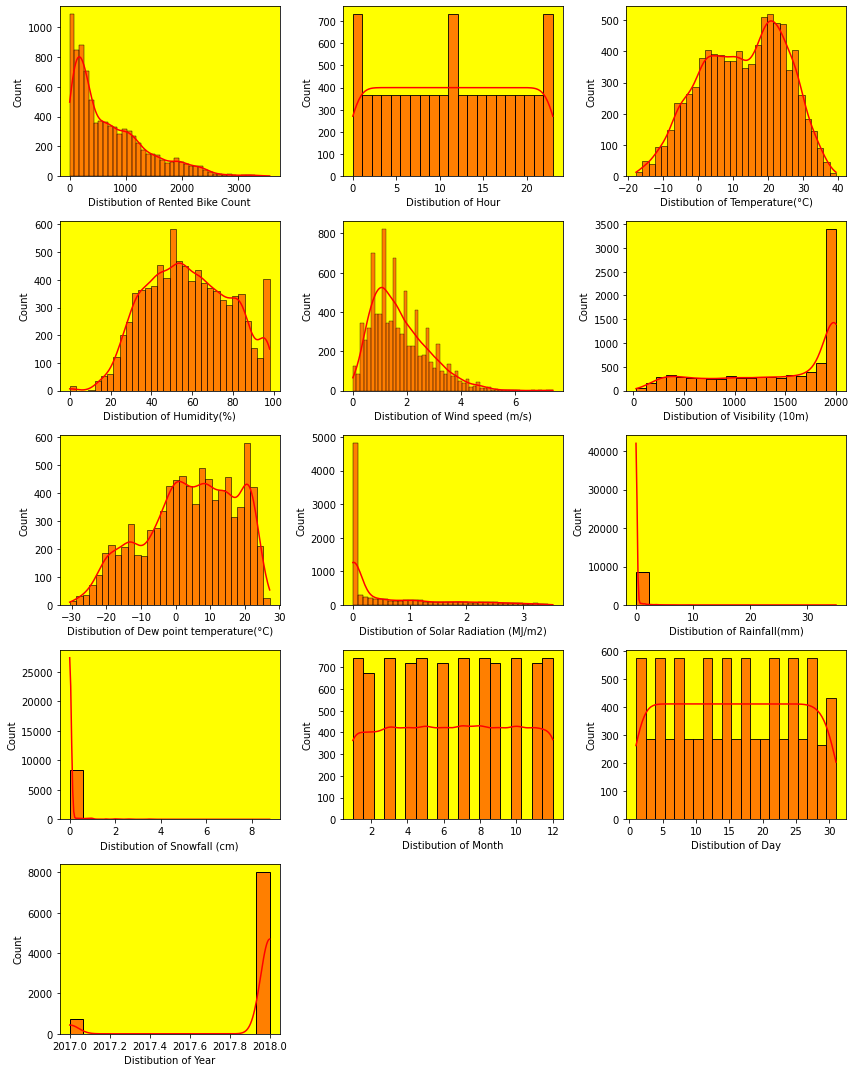

In [148]:
fig=plt.figure(figsize=(12,15))
c=1
for i in num_cols :
    plt.rcParams['axes.facecolor'] = 'yellow'
    plt.subplot(5,3, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.histplot(x=bikeData[i],kde=True,line_kws={'lw': 1.5},color='red')
    c = c + 1
plt.tight_layout()

Most of the paramteric machine learning models like LDA, Linear Regression and many more assume that the data is normally distributed. If this assumption fails the model fails to give accurate predictions. It is recommended to fix the skewness to make good decisions by the model. Here we see that-

*   Distribution of temperature,humidity and dew point temperature are normal
*   wind speed, solar radiation, snowfall and rainfall are positively skewed

*   Visibility is negatively skewed






Next, we check for outliers in our data. Box plot is a common tool to analyse outliers. In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

 How to interpret box plots?
* Median: In the box plot, the median is displayed rather than the mean.  

* Q1: The first quartile (25%) position

* Q3: The third quartile (75%) position
* Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.


* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers
*Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

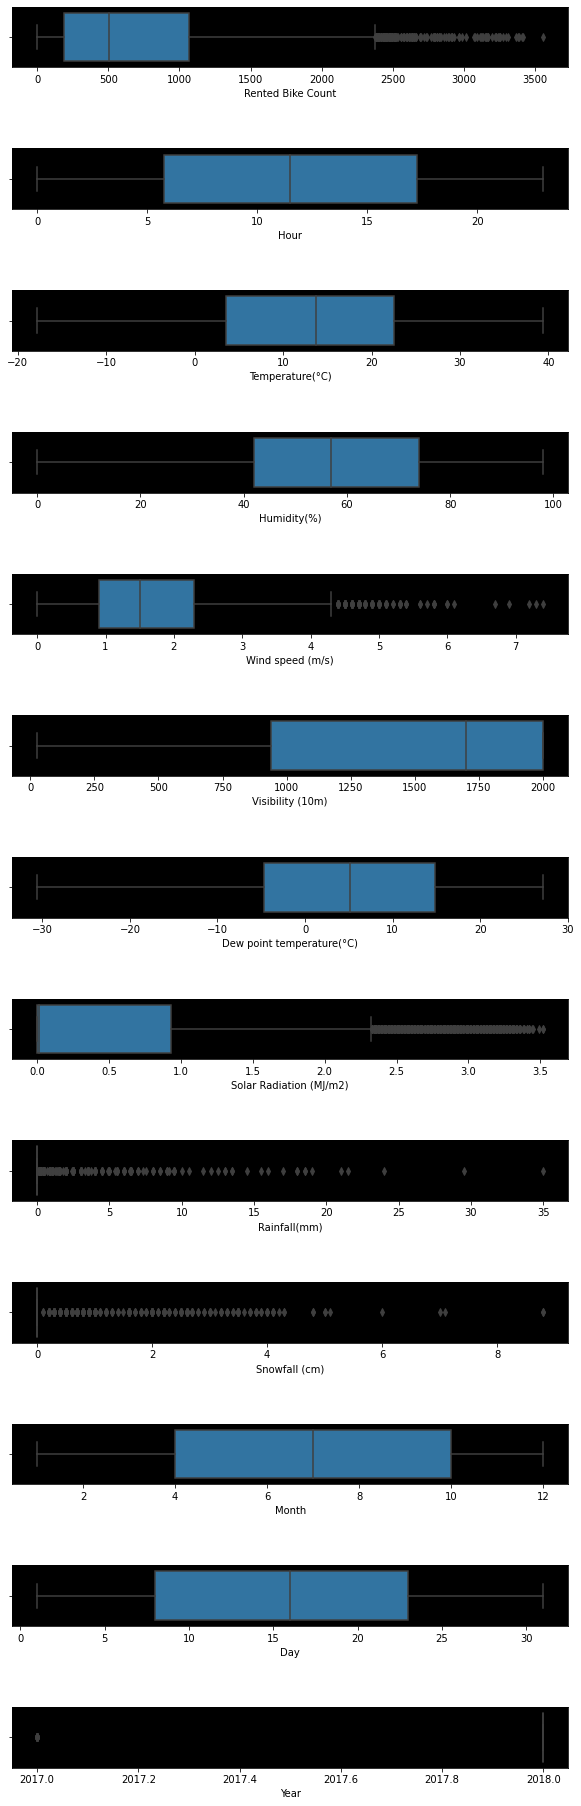

In [149]:
fig = plt.figure(figsize=(8,25))
c=1
for i in num_cols :
    plt.rcParams['axes.facecolor'] = 'black'
    plt.subplot(13,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=bikeData)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [150]:
bikeData.skew()

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Month                        -0.010458
Day                           0.007522
Year                         -2.978262
dtype: float64

We see most of our variables have outliers too

##**Feature Transformation Visualization**






Text(0.5, 1.0, 'cube root')

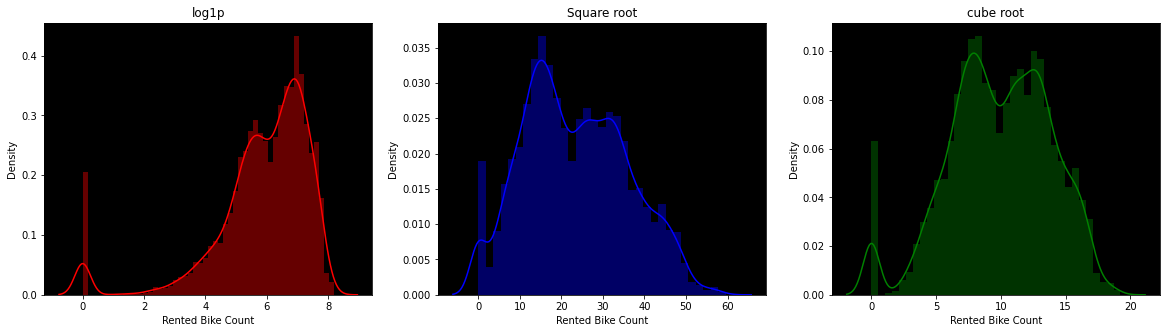

In [151]:
#Trying different transformations to see how they change the distribution
var=list(bikeData.select_dtypes(include=['float64','int64']).columns)
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log1p(bikeData['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log1p")
sns.distplot(np.sqrt(bikeData['Rented Bike Count']),ax=axes[1], color='blue').set_title("Square root")
sns.distplot(np.cbrt(bikeData['Rented Bike Count']*2),ax=axes[2], color='green').set_title("cube root")

    


Text(0.5, 1.0, 'cube root')

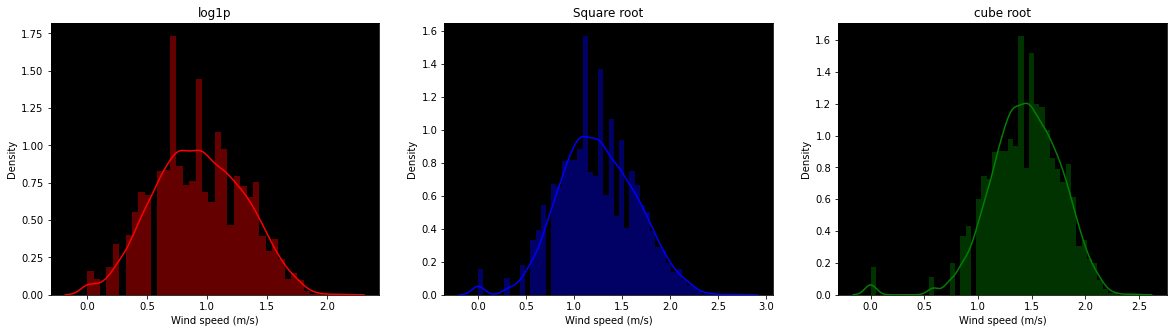

In [152]:
#Transformations of Wind Speed(m/s)
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log1p(bikeData['Wind speed (m/s)']+0.0000001),ax=axes[0],color='red').set_title("log1p")
sns.distplot(np.sqrt(bikeData['Wind speed (m/s)']),ax=axes[1], color='blue').set_title("Square root")
sns.distplot(np.cbrt(bikeData['Wind speed (m/s)']*2),ax=axes[2], color='green').set_title("cube root")

##**Correlation Heatmap**

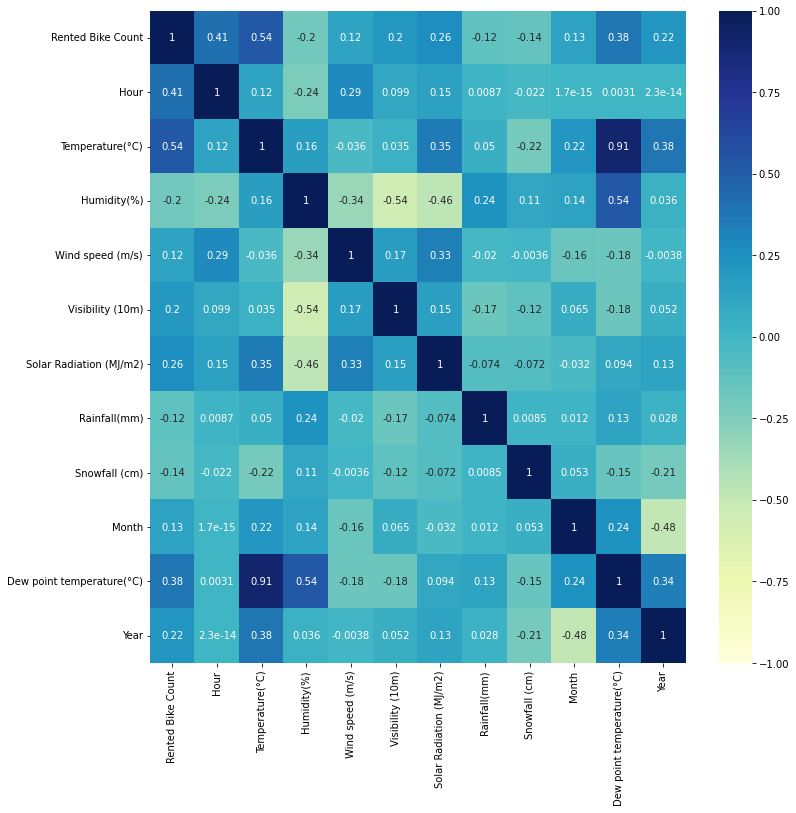

In [153]:
plt.figure(figsize = (12,12))
sns.heatmap(bikeData[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day','Month','Dew point temperature(°C)','Year']].corr(),vmin=-1,vmax=1,annot=True,cmap='YlGnBu')



*   Dew point temperature is strongly correlated with Temperature
*   Temperature, hour share a strong correlation with Rented Bike Count



##**Analysing categorical variables**

col_0    % observations
Seasons                
Autumn             2184
Spring             2208
Summer             2208
Winter             2160


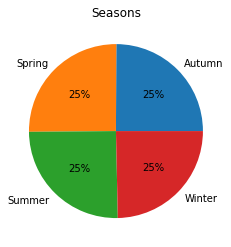

In [154]:
# We plot pie charts to see the distribution of categorical variables
#First we begin with seasons
season_var=pd.crosstab(index=bikeData['Seasons'],columns='% observations')
print(season_var)
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.0f%%')
plt.title('Seasons')
plt.show()

col_0            % observations
Functioning Day                
No                          295
Yes                        8465


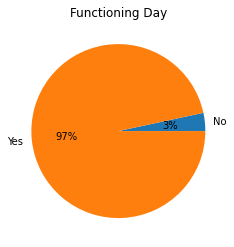

In [155]:
#Then we check for functioning day
Functioning_Day=pd.crosstab(index=bikeData['Functioning Day'],columns='% observations')
print(Functioning_Day)
plt.pie(Functioning_Day['% observations'],labels=Functioning_Day['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

col_0       % observations
Holiday                   
Holiday                432
No Holiday            8328


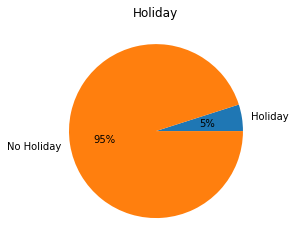

In [156]:
#Let's check for Holidays now
holiday=pd.crosstab(index=bikeData['Holiday'],columns='% observations')
print(holiday)
plt.pie(holiday['% observations'],labels=holiday['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

##**Feature Engineering**

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(dataframe):
  '''
  This function calculates the variance inflation factor of the independent features in the datasdet
  '''
  # the independent variables set
  X =dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [158]:
#checking VIF
check_vif(bikeData[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


In [159]:
#Temperature is more important feature than Dew point temperature, thus we drop dew point temperature and check the VIF
#VIF on removing Dew point temperature
check_vif(bikeData[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Day','Year']])

                    feature        VIF
0                      Hour   4.450438
1           Temperature(°C)   3.647553
2               Humidity(%)  24.006015
3          Wind speed (m/s)   4.882400
4          Visibility (10m)  10.721758
5   Solar Radiation (MJ/m2)   2.766789
6              Rainfall(mm)   1.089247
7             Snowfall (cm)   1.150346
8                     Month   5.108772
9                       Day   4.379687
10                     Year  63.529125


In [160]:
# Dropping the Dew point temperature from our dataset
bikeData.drop('Dew point temperature(°C)',inplace=True,axis=1)

In [161]:
bikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Day', 'Year'],
      dtype='object')

**Next, we convert the categorical variables into numerical**

In [162]:
bikeData_copy=bikeData.copy()
#Dummification of categorical features
columns_=['Seasons','Holiday','Functioning Day']
dummy_categorical_features = pd.get_dummies(bikeData[columns_],drop_first=True)
dummy_categorical_features.head(3)

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1


In [163]:
# Hour is also a categorical variable but converting it to numerical will result in 24 variables for each hour. Hence, we form four categories with 6 hrs in each
# Then we go for encoding to get four variables, and drop the Hour feature
def hour_half(x):
  if x<6: return '1sthalf'
  elif x<12: return '2ndhalf'
  elif x<18: return '3rdhalf'
  else: return '4thhalf'

bikeData['Hour_half']=bikeData.Hour.apply(lambda x:hour_half(x))

In [164]:
print(bikeData[['Hour','Hour_half']].sample(5))

      Hour Hour_half
4814    14   3rdhalf
3302    14   3rdhalf
6519    15   3rdhalf
233     17   3rdhalf
6584     8   2ndhalf


In [165]:
dummy_hour=pd.get_dummies(bikeData['Hour_half'],drop_first=True)

In [166]:
list_of_df=[bikeData_copy,dummy_categorical_features,dummy_hour]
bikeData=pd.concat(list_of_df, axis=1)
bikeData.drop(['Seasons','Functioning Day','Holiday','Date','Hour','Year'], axis=1, inplace=True) # We chose to drop the Year variable too as it has a high VIF and won't contribute much to the model
bikeData.columns


Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', '2ndhalf', '3rdhalf', '4thhalf'],
      dtype='object')

In [167]:
bikeData.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,2ndhalf,3rdhalf,4thhalf
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,0,0,1,1,1,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,0,0,1,1,1,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,0,0,1,1,1,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,0,0,1,1,1,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,0,0,1,1,1,0,0,0


##**Feature Selection**


In [168]:
#For numerical input variables and numerical output, we use Pearson's method for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [169]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)


SelectKBest(k='all', score_func=<function f_regression at 0x7f6d06ff6680>)

In [170]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100


**Feature contribution graph**

Humidity(%) : 1.13%
Wind speed (m/s) : 0.06%
Visibility (10m) : 0.05%
Solar Radiation (MJ/m2) : 6.17%
Rainfall(mm) : 0.11%
Snowfall (cm) : 2.17%
Month : 2.12%
Day : 0.01%
Seasons_Spring : 0.00%
Seasons_Summer : 34.43%
Seasons_Winter : 51.92%
Holiday_No Holiday : 0.14%
Functioning Day_Yes : 0.11%
2ndhalf : 0.25%
3rdhalf : 1.33%
4thhalf : 0.02%


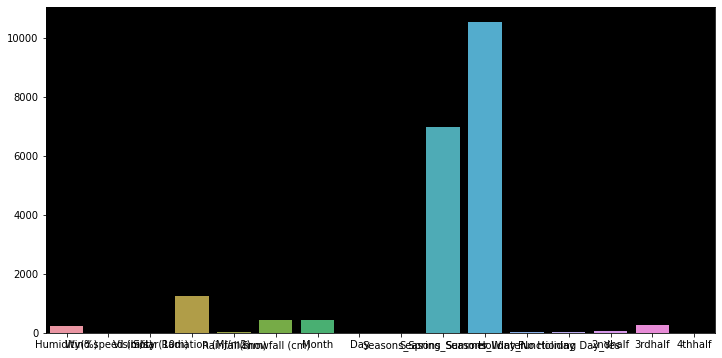

In [171]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()



*   We see summer and winter season variables have the highest contribution with 34% and 51% respectively.
*   This is quite obvious practically as in summers and winters the demand for bikes increase as compared to any other seasons.



In [172]:
X=bikeData.iloc[:,2:]
y=bikeData.iloc[:,1]


In [173]:
X.columns

Index(['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Day', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', '2ndhalf', '3rdhalf',
       '4thhalf'],
      dtype='object')

**splitting our dataset to train-test set**

In [174]:
from sklearn.model_selection import train_test_split
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [175]:
#Next we go for feature scaling. We implement Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##**Modelling**

In [176]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [177]:
# We create a dictionary to store different model's evaluation metrics for ease of comparison
model_comparison={}

Evaluation Metrics used for models:
Here are some metrics used in our project
1. R Square

2. Mean Square Error(MSE) and Root Mean Square Error(RMSE)

3. Cross Validation accuracy and standard deviation

R Square measures how much variability in dependent variable can be explained 
by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square. R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.





Linear Regression

In [178]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred):.2f}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.67%
Model MSE : 27.17
Model RMSE: 5.21
Cross Val Accuracy: 80.97 %
Cross Val Standard Deviation: 0.63 %


In [179]:
# We must also check if our model is overfitting. We calculate the R2 score for train set as well.
y_pred=model.predict(X_train)
r2_score(y_train,y_pred)

0.8105416526320484

Decision Tree

In [180]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),(accuracies.mean()),(accuracies.std())]

Model R-Square : 97.04%
Model MSE : 415.30
Model RMSE: 2.04
Cross Val Accuracy: 96.72 %
Cross Val Standard Deviation: 0.34 %


In [181]:
# We must also check if our model is overfitting. We calculate the R2 score for train set as well.
y_pred=model.predict(X_train)
r2_score(y_train,y_pred)

0.9999938589823988

From the R2 score of train and test set, we can see that our model is performing well on both the sets hence it's not overfitting. 

Random Forest Regression

In [182]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),(accuracies.mean()),(accuracies.std())]

Model R-Square : 98.14%
Model MSE : 261.40
Model RMSE: 1.62
Cross Val Accuracy: 97.94 %
Cross Val Standard Deviation: 0.14 %


In [183]:
# We must also check if our model is overfitting. We calculate the R2 score for train set as well.
y_pred=model.predict(X_train)
r2_score(y_train,y_pred)

0.996779906144704

Here too, we see the model is performing well on train and test sets hence no overfitting

Bagging Regressor

In [184]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),(accuracies.mean()),(accuracies.std())]

Model R-Square : 97.87%
Model MSE : 299.06
Model RMSE: 1.73
Cross Val Accuracy: 97.75 %
Cross Val Standard Deviation: 0.08 %


In [185]:
# We must also check if our model is overfitting. We calculate the R2 score for train set as well.
y_pred=model.predict(X_train)
r2_score(y_train,y_pred)

0.9927859991357898

XG Boost Regression

In [186]:
model = xgb.XGBRegressor(verbosity=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['XG Boost']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),(accuracies.mean()),(accuracies.std())]

Model R-Square : 94.92%
Model MSE : 713.66
Model RMSE: 2.67
Cross Val Accuracy: 94.72 %
Cross Val Standard Deviation: 0.18 %


In [187]:
# We must also check if our model is overfitting. We calculate the R2 score for train set as well.
y_pred=model.predict(X_train)
r2_score(y_train,y_pred)

0.9523904787105998

Stacking Regression

In [188]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [192]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),(accuracies.mean()),(accuracies.std())]

Model R-Square : 98.29%
Model MSE : 239.83
Model RMSE: 1.55
Cross Val Accuracy: 98.17 %
Cross Val Standard Deviation: 0.09 %


In [190]:
# We must also check if our model is overfitting. We calculate the R2 score for train set as well.
y_pred=model.predict(X_train)
r2_score(y_train,y_pred)

0.9973021860816313

In [193]:
# Calculating RMPSE for Stacking Regressor
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"The RMSE of the model is: {rmse}")
print(f"The mean of dependent variable y is: {y.mean()}")
rmpse=rmse/y.mean()
print(f"Therefore, the RMPSE is: {rmpse*100:.2f}%")


The RMSE of the model is: 1.5486469488405241
The mean of dependent variable y is: 12.882922374429223
Therefore, the RMPSE is: 12.02%


##**Model comparison**

In [194]:
# After implementing various models, we compare the evaluation metrics of different models to decide the best model
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','RMSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,RMSE,CV Accuracy,CV std
Stacking Regressor,0.98,2.4,1.5,0.98,0.00089
Random forest Regression,0.98,2.6,1.6,0.98,0.0014
Bagging Regressor,0.98,3.0,1.7,0.98,0.00083
Decision Tree Regression,0.97,4.2,2.0,0.97,0.0034
XG Boost,0.95,7.1,2.7,0.95,0.0018
Linear Regression,0.81,2.7e+01,5.2,0.81,0.0063


**Maximum accuracies in each column**

In [195]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2}")

,R-Square,MSE,RMSE,CV Accuracy,CV std
Stacking Regressor,0.98,2.4,1.5,0.98,0.00089
Random forest Regression,0.98,2.6,1.6,0.98,0.0014
Bagging Regressor,0.98,3.0,1.7,0.98,0.00083
Decision Tree Regression,0.97,4.2,2.0,0.97,0.0034
XG Boost,0.95,7.1,2.7,0.95,0.0018
Linear Regression,0.81,2.7e+01,5.2,0.81,0.0063


#**Conclusion**

Hence, from the model comparison chart we see that R2 score of Stacking Regressor, Random Forest and Bagging regressor models are the highest and most closer to 1 (=0.98) .R-Squared or the coefficient of determination is the most important important evaluation metric. It is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model. Of all the models implemented, we see the R2 score of three models are the same, so we see the next evaluation parameter, MSE and RMSE. 

MSE and RMSE don't provide insights individually, i.e just by looking at the number we can't conclude anything about the model. Rather its a comparison metric used to compare the performance of different models for the same data set. From the model comparison chart, we see that MSE and RMSE is minimum for Stacking Regressor model. Therefore, its the best model for our business problem. Also, RMPSE is 12% for the model which is quite acceptable.

For the given problem, I've also calculated the cross validation accuracy and standard deviation. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error. We find the CV accuracy of Stacking Regressor to be 0.98 or 98% which is quite a good value.

Therefore, Stacking Regressor is the best model for the given business problem